In [4]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('../../data/preprocessed_data.csv')
data.head(5)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_root,...,service_smtp,flag_S0,flag_SF,flag_other,land_1,logged_in_1,root_shell_1,is_host_login_1,is_guest_login_1,attack_category
0,-0.110249,-0.007679,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,0,1,0,0,0,0,0,0,1
1,-0.110249,-0.007737,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,0,1,0,0,0,0,0,0,1
2,-0.110249,-0.007762,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,1,0,0,0,0,0,0,0,0
3,-0.110249,-0.007723,-0.002891,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,0,1,0,0,1,0,0,0,1
4,-0.110249,-0.007728,-0.004814,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,0,1,0,0,1,0,0,0,1


<br/>
<br/>
<br/>
<br/>

### TRAIN , VALIDATION , TEST SPLIT 

In [10]:
X = data.drop(['attack_category'],axis=1)
y = data['attack_category']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X , y , test_size=0.4 , random_state=42 , stratify = y)

In [16]:
X_test , X_val , y_test , y_val = train_test_split(X_test , y_test , test_size = 0.5 , random_state=42 , stratify = y_test)

In [18]:
X_train.shape , y_train.shape

((75583, 46), (75583,))

In [19]:
X_test.shape , y_test.shape

((25195, 46), (25195,))

In [20]:
X_val.shape , y_val.shape

((25195, 46), (25195,))

<br/>
<br/>
<br/>
<br/>

#### REINDEXING DATA

In [21]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

<br/>
<br/>
<br/>
<br/>
<br/>

## EXPERIMENTATION

In [24]:
no_output_layer_nodes = len(y_train.unique())
no_output_layer_nodes

5

# EPOCHS VS ACCURACY FOR SGD

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense( no_output_layer_nodes , activation=tf.keras.activations.softmax , name = "output_lasyer" )
])

model.compile( optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'] )



In [46]:
epoch_vs_accuracy = {}
epoch=1
while epoch!=40:
    history = model.fit( X_train , y_train , epochs=1 , validation_data=(X_val,y_val) , verbose = 1 )
    epoch_vs_accuracy[epoch] = history.history
    epoch = epoch + 1

2362/2362 [==============================] - 4s 2ms/step - loss: 0.0752 - accuracy: 0.9773 - val_loss: 0.0839 - val_accuracy: 0.9765


In [48]:
epoch_vs_accuracy

{1: {'loss': [0.08680804073810577],
  'accuracy': [0.9745577573776245],
  'val_loss': [0.09119018912315369],
  'val_accuracy': [0.9737249612808228]},
 2: {'loss': [0.08598948270082474],
  'accuracy': [0.9747297763824463],
  'val_loss': [0.09100454300642014],
  'val_accuracy': [0.9738043546676636]},
 3: {'loss': [0.08552385866641998],
  'accuracy': [0.9749149680137634],
  'val_loss': [0.09038235992193222],
  'val_accuracy': [0.9739630818367004]},
 4: {'loss': [0.08503837883472443],
  'accuracy': [0.9750605225563049],
  'val_loss': [0.09010648727416992],
  'val_accuracy': [0.9734470844268799]},
 5: {'loss': [0.0845150351524353],
  'accuracy': [0.9749943614006042],
  'val_loss': [0.0896676629781723],
  'val_accuracy': [0.9736058712005615]},
 6: {'loss': [0.0841207504272461],
  'accuracy': [0.9751134514808655],
  'val_loss': [0.08922433108091354],
  'val_accuracy': [0.9736455678939819]},
 7: {'loss': [0.08361435681581497],
  'accuracy': [0.9753119349479675],
  'val_loss': [0.08873417973518

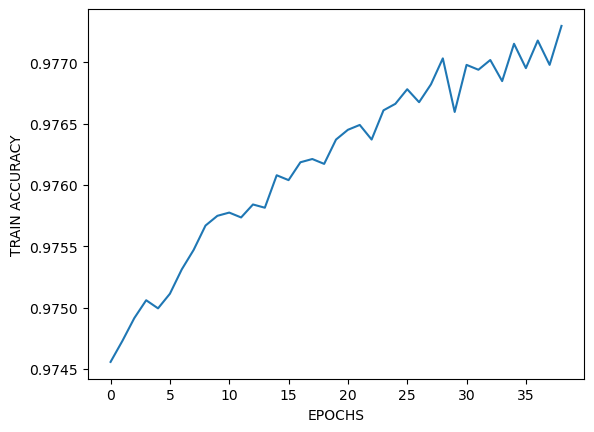

In [50]:
plt.plot(
    [epoch_vs_accuracy[i]["accuracy"][0] for i in range(1,40)]
)
plt.xlabel("EPOCHS")
plt.ylabel("TRAIN ACCURACY")
plt.show()

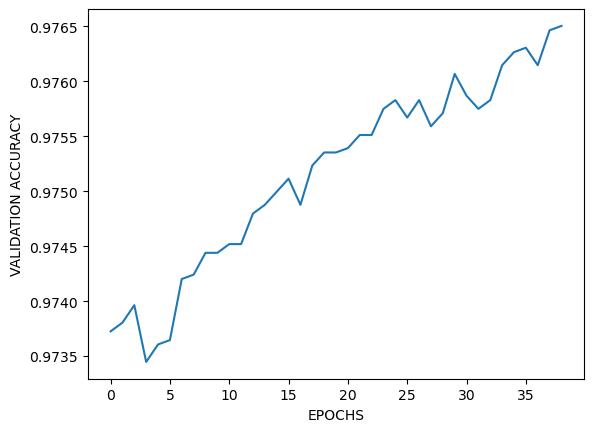

In [51]:
plt.plot(
    [epoch_vs_accuracy[i]["val_accuracy"][0] for i in range(1,40)]
)
plt.xlabel("EPOCHS")
plt.ylabel("VALIDATION ACCURACY")
plt.show()

<br/>
<br/>
<br/>
<br/>

# EPOCHS VS ACCURACY FOR ADAM

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense( no_output_layer_nodes , activation=tf.keras.activations.softmax , name = "output_lasyer" )
])

model.compile( optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'] )


In [57]:
epoch_vs_accuracy = {}
epoch=1
while epoch!=40:
    history = model.fit( X_train , y_train , epochs=1 , validation_data=(X_val,y_val) , verbose = 1 )
    epoch_vs_accuracy[epoch] = history.history
    epoch = epoch + 1

2362/2362 [==============================] - 3s 1ms/step - loss: 0.0597 - accuracy: 0.9808 - val_loss: 0.1147 - val_accuracy: 0.9798


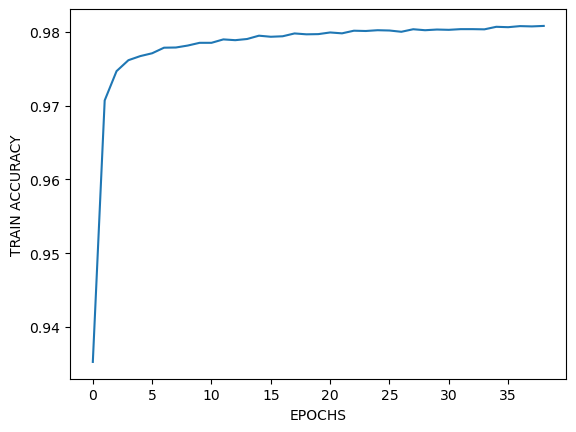

In [58]:
plt.plot(
    [epoch_vs_accuracy[i]["accuracy"][0] for i in range(1,40)]
)
plt.xlabel("EPOCHS")
plt.ylabel("TRAIN ACCURACY")
plt.show()

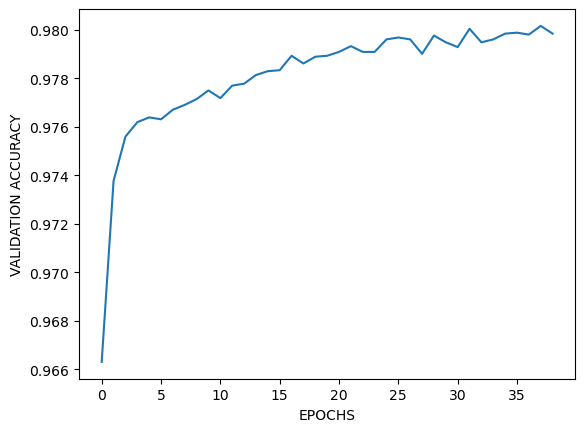

In [59]:
plt.plot(
    [epoch_vs_accuracy[i]["val_accuracy"][0] for i in range(1,40)]
)
plt.xlabel("EPOCHS")
plt.ylabel("VALIDATION ACCURACY")
plt.show()

<br/>
<br/>
<br/>
<br/>

# ADDING HIDDEN LAYER

In [62]:
layer_vs_accuracy = {}

for i in range(1,15):
    print("==========================LAYER "+str(i)+" =====================================")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense( i , activation=tf.keras.activations.relu , name = 'Hidden_layer_1' ),
        tf.keras.layers.Dense( no_output_layer_nodes , activation=tf.keras.activations.softmax , name = "output_layer" )
    ])

    model.compile( optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   metrics=['accuracy'] )
    
    history = model.fit( X_train , y_train , epochs=10 , validation_data=(X_val,y_val) , verbose = 1 )
    layer_vs_accuracy[i] = history.history

==========================LAYER 1 =====================================
Epoch 1/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.6033 - accuracy: 0.8551 - val_loss: 0.3758 - val_accuracy: 0.8887
Epoch 2/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.3226 - accuracy: 0.8907 - val_loss: 0.2929 - val_accuracy: 0.8903
Epoch 3/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.2734 - accuracy: 0.9082 - val_loss: 0.2682 - val_accuracy: 0.9139
Epoch 4/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.2566 - accuracy: 0.9266 - val_loss: 0.2573 - val_accuracy: 0.9311
Epoch 5/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.2469 - accuracy: 0.9323 - val_loss: 0.2505 - val_accuracy: 0.9382
Epoch 6/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.2406 - accuracy: 0.9370 - val_loss: 0.2450 - val_accuracy: 0.9325
Epoch 7/10
2362/2362 [==============================] - 3s 1ms/s

Epoch 5/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0280 - accuracy: 0.9921 - val_loss: 0.0356 - val_accuracy: 0.9925
Epoch 6/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0256 - accuracy: 0.9929 - val_loss: 0.0355 - val_accuracy: 0.9906
Epoch 7/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0245 - accuracy: 0.9932 - val_loss: 0.0336 - val_accuracy: 0.9927
Epoch 8/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0236 - accuracy: 0.9933 - val_loss: 0.0341 - val_accuracy: 0.9933
Epoch 9/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0228 - accuracy: 0.9938 - val_loss: 0.0363 - val_accuracy: 0.9934
Epoch 10/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0227 - accuracy: 0.9938 - val_loss: 0.0359 - val_accuracy: 0.9938
==========================LAYER 7 =====================================
Epoch 1/10
2362/2362 [==============================] - 3s 1ms/

2362/2362 [==============================] - 3s 1ms/step - loss: 0.0176 - accuracy: 0.9951 - val_loss: 0.0336 - val_accuracy: 0.9954
Epoch 10/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0168 - accuracy: 0.9955 - val_loss: 0.0346 - val_accuracy: 0.9943
==========================LAYER 12 =====================================
Epoch 1/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.1885 - accuracy: 0.9437 - val_loss: 0.0571 - val_accuracy: 0.9803
Epoch 2/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0408 - accuracy: 0.9887 - val_loss: 0.0350 - val_accuracy: 0.9920
Epoch 3/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0283 - accuracy: 0.9928 - val_loss: 0.0276 - val_accuracy: 0.9940
Epoch 4/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0230 - accuracy: 0.9938 - val_loss: 0.0240 - val_accuracy: 0.9942
Epoch 5/10
2362/2362 [==============================] - 3s 1ms/step - los

In [63]:
layer_vs_accuracy

{1: {'loss': [0.6032859086990356,
   0.3225873112678528,
   0.2734065055847168,
   0.2565686106681824,
   0.24687543511390686,
   0.2406070977449417,
   0.2360561192035675,
   0.2325238138437271,
   0.23015393316745758,
   0.22812269628047943],
  'accuracy': [0.855126142501831,
   0.8906632661819458,
   0.908220112323761,
   0.9265575408935547,
   0.9323393106460571,
   0.9369699358940125,
   0.9381739497184753,
   0.9397880434989929,
   0.9407406449317932,
   0.9414021968841553],
  'val_loss': [0.37576279044151306,
   0.29290544986724854,
   0.2682272493839264,
   0.2573114335536957,
   0.25053825974464417,
   0.2450077086687088,
   0.24231402575969696,
   0.2391701191663742,
   0.23718439042568207,
   0.23576457798480988],
  'val_accuracy': [0.8886683583259583,
   0.8902559876441956,
   0.9139114618301392,
   0.9310974478721619,
   0.9382020235061646,
   0.9325262904167175,
   0.9354236721992493,
   0.939710259437561,
   0.9380829334259033,
   0.9373685121536255]},
 2: {'loss': [0.46

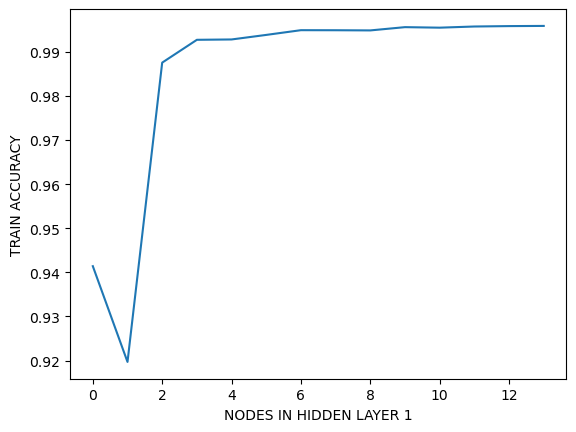

In [68]:
plt.plot(
    [layer_vs_accuracy[i]["accuracy"][9] for i in range(1,15)]
)
plt.xlabel("NODES IN HIDDEN LAYER 1")
plt.ylabel("TRAIN ACCURACY")
plt.show()

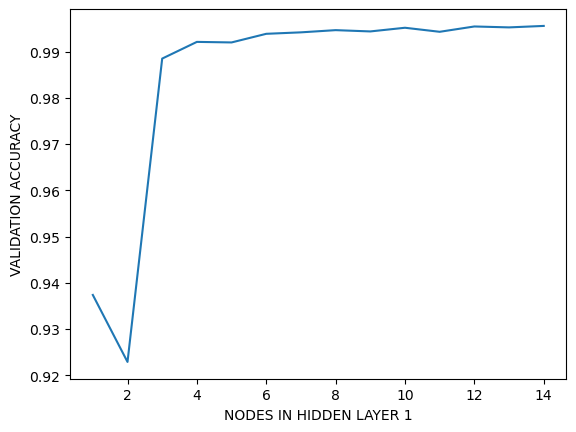

In [70]:
plt.plot(
    [i for i in range(1,15)] ,
    [layer_vs_accuracy[i]["val_accuracy"][9] for i in range(1,15)]
)
plt.xlabel("NODES IN HIDDEN LAYER 1")
plt.ylabel("VALIDATION ACCURACY")
plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# ADDING HIDDEN LAYER 2

In [72]:
layer_vs_accuracy = {}
for i in range(8,13):
    print("==========================LAYER 1 =>"+str(i)+" =====================================")
    second_hidden_layer_info = {}
    
    for j in range(1,15):
        print("==========================LAYER 2 =>"+str(j)+" =====================================")
        model = tf.keras.Sequential([
            tf.keras.layers.Dense( i , activation=tf.keras.activations.relu , name = 'Hidden_layer_1' ),
            tf.keras.layers.Dense( j , activation=tf.keras.activations.relu , name = 'Hidden_layer_2' ),
            tf.keras.layers.Dense( no_output_layer_nodes , activation=tf.keras.activations.softmax , name = "output_layer" )
        ])

        model.compile( optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       metrics=['accuracy'] )

        history = model.fit( X_train , y_train , epochs=10 , validation_data=(X_val,y_val) , verbose = 1 )
        second_hidden_layer_info[j] = history.history
    
    layer_vs_accuracy[i] = second_hidden_layer_info

==========================LAYER 1 =>8 =====================================
==========================LAYER 2 =>1 =====================================
Epoch 1/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.5148 - accuracy: 0.8861 - val_loss: 0.2630 - val_accuracy: 0.8970
Epoch 2/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.1816 - accuracy: 0.9498 - val_loss: 0.1290 - val_accuracy: 0.9800
Epoch 3/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.1021 - accuracy: 0.9828 - val_loss: 0.0937 - val_accuracy: 0.9839
Epoch 4/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0768 - accuracy: 0.9854 - val_loss: 0.0770 - val_accuracy: 0.9859
Epoch 5/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0661 - accuracy: 0.9865 - val_loss: 0.0717 - val_accuracy: 0.9856
Epoch 6/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0601 - accuracy: 0.9870 - val_loss: 0.0662 - val_a

2362/2362 [==============================] - 3s 1ms/step - loss: 0.0238 - accuracy: 0.9940 - val_loss: 0.0334 - val_accuracy: 0.9935
Epoch 5/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0219 - accuracy: 0.9945 - val_loss: 0.0327 - val_accuracy: 0.9941
Epoch 6/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0202 - accuracy: 0.9950 - val_loss: 0.0347 - val_accuracy: 0.9912
Epoch 7/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0184 - accuracy: 0.9951 - val_loss: 0.0298 - val_accuracy: 0.9948
Epoch 8/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0174 - accuracy: 0.9954 - val_loss: 0.0323 - val_accuracy: 0.9948
Epoch 9/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0168 - accuracy: 0.9955 - val_loss: 0.0341 - val_accuracy: 0.9953
Epoch 10/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0165 - accuracy: 0.9956 - val_loss: 0.0339 - val_accuracy: 0.9950
==

2362/2362 [==============================] - 3s 1ms/step - loss: 0.0183 - accuracy: 0.9952 - val_loss: 0.0240 - val_accuracy: 0.9954
Epoch 9/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0170 - accuracy: 0.9956 - val_loss: 0.0200 - val_accuracy: 0.9950
Epoch 10/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0164 - accuracy: 0.9955 - val_loss: 0.0225 - val_accuracy: 0.9954
==========================LAYER 2 =>12 =====================================
Epoch 1/10
2362/2362 [==============================] - 4s 1ms/step - loss: 0.1955 - accuracy: 0.9462 - val_loss: 0.0594 - val_accuracy: 0.9859
Epoch 2/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0381 - accuracy: 0.9895 - val_loss: 0.0326 - val_accuracy: 0.9929
Epoch 3/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0255 - accuracy: 0.9931 - val_loss: 0.0269 - val_accuracy: 0.9936
Epoch 4/10
2362/2362 [==============================] - 3s 1ms/step -

2362/2362 [==============================] - 3s 1ms/step - loss: 0.2408 - accuracy: 0.9228 - val_loss: 0.0638 - val_accuracy: 0.9797
Epoch 2/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0466 - accuracy: 0.9871 - val_loss: 0.0387 - val_accuracy: 0.9909
Epoch 3/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0325 - accuracy: 0.9913 - val_loss: 0.0311 - val_accuracy: 0.9919
Epoch 4/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0274 - accuracy: 0.9924 - val_loss: 0.0292 - val_accuracy: 0.9924
Epoch 5/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0240 - accuracy: 0.9932 - val_loss: 0.0268 - val_accuracy: 0.9926
Epoch 6/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0219 - accuracy: 0.9939 - val_loss: 0.0249 - val_accuracy: 0.9933
Epoch 7/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0209 - accuracy: 0.9941 - val_loss: 0.0238 - val_accuracy: 0.9938
Epo

2362/2362 [==============================] - 3s 1ms/step - loss: 0.0191 - accuracy: 0.9947 - val_loss: 0.0232 - val_accuracy: 0.9939
Epoch 6/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0177 - accuracy: 0.9952 - val_loss: 0.0234 - val_accuracy: 0.9940
Epoch 7/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0170 - accuracy: 0.9953 - val_loss: 0.0214 - val_accuracy: 0.9951
Epoch 8/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0164 - accuracy: 0.9955 - val_loss: 0.0214 - val_accuracy: 0.9951
Epoch 9/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0160 - accuracy: 0.9954 - val_loss: 0.0208 - val_accuracy: 0.9946
Epoch 10/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0153 - accuracy: 0.9956 - val_loss: 0.0204 - val_accuracy: 0.9949
==========================LAYER 2 =>9 =====================================
Epoch 1/10
2362/2362 [==============================] - 4s 2ms/step - 

2362/2362 [==============================] - 3s 1ms/step - loss: 0.0175 - accuracy: 0.9951 - val_loss: 0.0210 - val_accuracy: 0.9949
Epoch 10/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0168 - accuracy: 0.9952 - val_loss: 0.0196 - val_accuracy: 0.9948
==========================LAYER 2 =>14 =====================================
Epoch 1/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.1569 - accuracy: 0.9526 - val_loss: 0.0527 - val_accuracy: 0.9825
Epoch 2/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0403 - accuracy: 0.9854 - val_loss: 0.0338 - val_accuracy: 0.9867
Epoch 3/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0280 - accuracy: 0.9917 - val_loss: 0.0264 - val_accuracy: 0.9941
Epoch 4/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0230 - accuracy: 0.9946 - val_loss: 0.0235 - val_accuracy: 0.9945
Epoch 5/10
2362/2362 [==============================] - 3s 1ms/step -

2362/2362 [==============================] - 3s 1ms/step - loss: 0.0749 - accuracy: 0.9890 - val_loss: 0.0484 - val_accuracy: 0.9919
Epoch 3/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0370 - accuracy: 0.9928 - val_loss: 0.0322 - val_accuracy: 0.9936
Epoch 4/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0267 - accuracy: 0.9939 - val_loss: 0.0265 - val_accuracy: 0.9936
Epoch 5/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0231 - accuracy: 0.9943 - val_loss: 0.0237 - val_accuracy: 0.9944
Epoch 6/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0214 - accuracy: 0.9946 - val_loss: 0.0227 - val_accuracy: 0.9945
Epoch 7/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0201 - accuracy: 0.9947 - val_loss: 0.0215 - val_accuracy: 0.9948
Epoch 8/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0189 - accuracy: 0.9952 - val_loss: 0.0258 - val_accuracy: 0.9948
Epo

2362/2362 [==============================] - 3s 1ms/step - loss: 0.0174 - accuracy: 0.9953 - val_loss: 0.0215 - val_accuracy: 0.9954
Epoch 7/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0167 - accuracy: 0.9956 - val_loss: 0.0212 - val_accuracy: 0.9948
Epoch 8/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0157 - accuracy: 0.9956 - val_loss: 0.0198 - val_accuracy: 0.9957
Epoch 9/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0152 - accuracy: 0.9960 - val_loss: 0.0201 - val_accuracy: 0.9950
Epoch 10/10
2362/2362 [==============================] - 4s 2ms/step - loss: 0.0147 - accuracy: 0.9959 - val_loss: 0.0199 - val_accuracy: 0.9954
==========================LAYER 2 =>11 =====================================
Epoch 1/10
2362/2362 [==============================] - 4s 1ms/step - loss: 0.1790 - accuracy: 0.9498 - val_loss: 0.0569 - val_accuracy: 0.9831
Epoch 2/10
2362/2362 [==============================] - 3s 1ms/step -

Epoch 10/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0872 - accuracy: 0.9804 - val_loss: 0.0840 - val_accuracy: 0.9821
==========================LAYER 2 =>2 =====================================
Epoch 1/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.3552 - accuracy: 0.9283 - val_loss: 0.0692 - val_accuracy: 0.9825
Epoch 2/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0491 - accuracy: 0.9867 - val_loss: 0.0438 - val_accuracy: 0.9898
Epoch 3/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0339 - accuracy: 0.9913 - val_loss: 0.0375 - val_accuracy: 0.9925
Epoch 4/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0279 - accuracy: 0.9928 - val_loss: 0.0343 - val_accuracy: 0.9925
Epoch 5/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0246 - accuracy: 0.9934 - val_loss: 0.0316 - val_accuracy: 0.9932
Epoch 6/10
2362/2362 [==============================] - 3s 

Epoch 4/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0218 - accuracy: 0.9935 - val_loss: 0.0229 - val_accuracy: 0.9941
Epoch 5/10
2362/2362 [==============================] - 4s 2ms/step - loss: 0.0195 - accuracy: 0.9944 - val_loss: 0.0205 - val_accuracy: 0.9946
Epoch 6/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0182 - accuracy: 0.9950 - val_loss: 0.0199 - val_accuracy: 0.9951
Epoch 7/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0173 - accuracy: 0.9951 - val_loss: 0.0203 - val_accuracy: 0.9944
Epoch 8/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0165 - accuracy: 0.9953 - val_loss: 0.0191 - val_accuracy: 0.9955
Epoch 9/10
2362/2362 [==============================] - 4s 1ms/step - loss: 0.0162 - accuracy: 0.9954 - val_loss: 0.0184 - val_accuracy: 0.9957
Epoch 10/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0155 - accuracy: 0.9956 - val_loss: 0.0178 - val_accuracy

2362/2362 [==============================] - 3s 1ms/step - loss: 0.0151 - accuracy: 0.9957 - val_loss: 0.0268 - val_accuracy: 0.9946
Epoch 9/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0146 - accuracy: 0.9960 - val_loss: 0.0234 - val_accuracy: 0.9958
Epoch 10/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.0266 - val_accuracy: 0.9945
==========================LAYER 2 =>13 =====================================
Epoch 1/10
2362/2362 [==============================] - 4s 1ms/step - loss: 0.1585 - accuracy: 0.9559 - val_loss: 0.0560 - val_accuracy: 0.9809
Epoch 2/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0376 - accuracy: 0.9895 - val_loss: 0.0290 - val_accuracy: 0.9927
Epoch 3/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0255 - accuracy: 0.9936 - val_loss: 0.0247 - val_accuracy: 0.9936
Epoch 4/10
2362/2362 [==============================] - 3s 1ms/step -

2362/2362 [==============================] - 5s 1ms/step - loss: 0.1729 - accuracy: 0.9497 - val_loss: 0.0608 - val_accuracy: 0.9826
Epoch 2/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0390 - accuracy: 0.9884 - val_loss: 0.0364 - val_accuracy: 0.9911
Epoch 3/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0259 - accuracy: 0.9928 - val_loss: 0.0312 - val_accuracy: 0.9929
Epoch 4/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.0275 - val_accuracy: 0.9940
Epoch 5/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0203 - accuracy: 0.9942 - val_loss: 0.0244 - val_accuracy: 0.9945
Epoch 6/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0183 - accuracy: 0.9950 - val_loss: 0.0240 - val_accuracy: 0.9932
Epoch 7/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0175 - accuracy: 0.9951 - val_loss: 0.0204 - val_accuracy: 0.9950
Epo

2362/2362 [==============================] - 3s 1ms/step - loss: 0.0191 - accuracy: 0.9948 - val_loss: 0.0243 - val_accuracy: 0.9944
Epoch 6/10
2362/2362 [==============================] - 3s 1ms/step - loss: 0.0174 - accuracy: 0.9952 - val_loss: 0.0248 - val_accuracy: 0.9948
Epoch 7/10
2362/2362 [==============================] - 4s 2ms/step - loss: 0.0169 - accuracy: 0.9951 - val_loss: 0.0218 - val_accuracy: 0.9948
Epoch 8/10
2362/2362 [==============================] - 4s 2ms/step - loss: 0.0156 - accuracy: 0.9955 - val_loss: 0.0218 - val_accuracy: 0.9952
Epoch 9/10
2362/2362 [==============================] - 4s 2ms/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.0216 - val_accuracy: 0.9954
Epoch 10/10
2362/2362 [==============================] - 4s 2ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0213 - val_accuracy: 0.9950
==========================LAYER 2 =>10 =====================================
Epoch 1/10
2362/2362 [==============================] - 4s 1ms/step -

2362/2362 [==============================] - 5s 2ms/step - loss: 0.0154 - accuracy: 0.9957 - val_loss: 0.0239 - val_accuracy: 0.9951
Epoch 10/10
2362/2362 [==============================] - 5s 2ms/step - loss: 0.0150 - accuracy: 0.9958 - val_loss: 0.0267 - val_accuracy: 0.9954


In [73]:
layer_vs_accuracy

{8: {1: {'loss': [0.5147814750671387,
    0.18164637684822083,
    0.10213308036327362,
    0.0767698660492897,
    0.06611646711826324,
    0.06013668328523636,
    0.056790437549352646,
    0.05426189675927162,
    0.05267588049173355,
    0.05137500911951065],
   'accuracy': [0.8860987424850464,
    0.9497770667076111,
    0.9828400611877441,
    0.9854332208633423,
    0.986518144607544,
    0.9870076775550842,
    0.9877353310585022,
    0.9881587028503418,
    0.9885556101799011,
    0.9886482357978821],
   'val_loss': [0.26296305656433105,
    0.129021555185318,
    0.0937141627073288,
    0.07697191834449768,
    0.07173934578895569,
    0.06619686633348465,
    0.06481179594993591,
    0.06067102774977684,
    0.06032378971576691,
    0.06002819910645485],
   'val_accuracy': [0.8969636559486389,
    0.9800357222557068,
    0.9838857054710388,
    0.9858702421188354,
    0.9855923652648926,
    0.9861083626747131,
    0.9863067865371704,
    0.986822783946991,
    0.98769599199

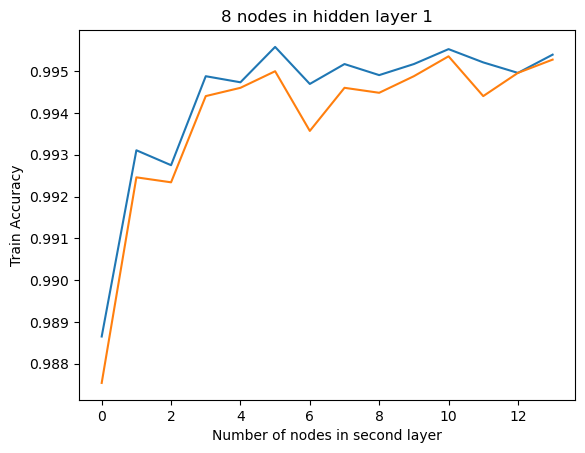

In [76]:
eight_in_hl_one = layer_vs_accuracy[8]
plt.plot( [eight_in_hl_one[i]['accuracy'][9] for i in range(1,15)] )
plt.xlabel("Number of nodes in second layer")
plt.ylabel("Train Accuracy")
plt.title("8 nodes in hidden layer 1")

plt.plot( [eight_in_hl_one[i]['val_accuracy'][9] for i in range(1,15)] )
plt.xlabel("Number of nodes in second layer")
plt.ylabel("Train Accuracy")
plt.title("8 nodes in hidden layer 1")

plt.show()

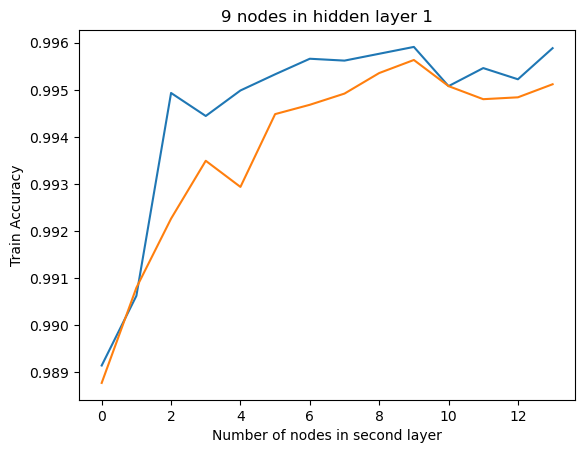

In [79]:
nine_in_hl_one = layer_vs_accuracy[9]
plt.plot( [nine_in_hl_one[i]['accuracy'][9] for i in range(1,15)] )
plt.xlabel("Number of nodes in second layer")
plt.ylabel("Train Accuracy")
plt.title("9 nodes in hidden layer 1")

plt.plot( [nine_in_hl_one[i]['val_accuracy'][9] for i in range(1,15)] )
plt.xlabel("Number of nodes in second layer")
plt.ylabel("Train Accuracy")
plt.title("9 nodes in hidden layer 1")

plt.show()

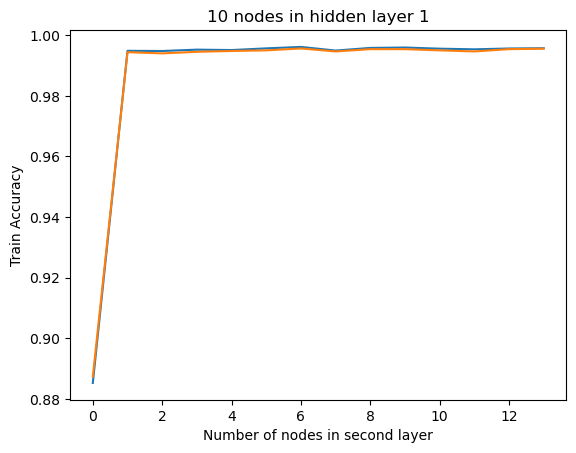

In [80]:
ten_in_hl_one = layer_vs_accuracy[10]
plt.plot( [ten_in_hl_one[i]['accuracy'][9] for i in range(1,15)] )
plt.xlabel("Number of nodes in second layer")
plt.ylabel("Train Accuracy")
plt.title("10 nodes in hidden layer 1")

plt.plot( [ten_in_hl_one[i]['val_accuracy'][9] for i in range(1,15)] )
plt.xlabel("Number of nodes in second layer")
plt.ylabel("Train Accuracy")
plt.title("10 nodes in hidden layer 1")

plt.show()

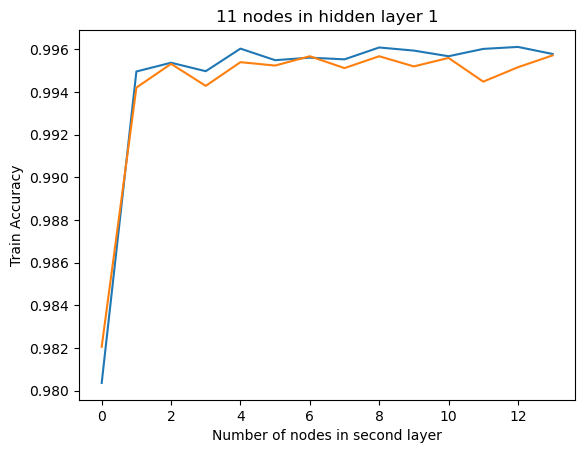

In [81]:
eleven_in_hl_one = layer_vs_accuracy[11]
plt.plot( [eleven_in_hl_one[i]['accuracy'][9] for i in range(1,15)] )
plt.xlabel("Number of nodes in second layer")
plt.ylabel("Train Accuracy")
plt.title("11 nodes in hidden layer 1")

plt.plot( [eleven_in_hl_one[i]['val_accuracy'][9] for i in range(1,15)] )
plt.xlabel("Number of nodes in second layer")
plt.ylabel("Train Accuracy")
plt.title("11 nodes in hidden layer 1")

plt.show()

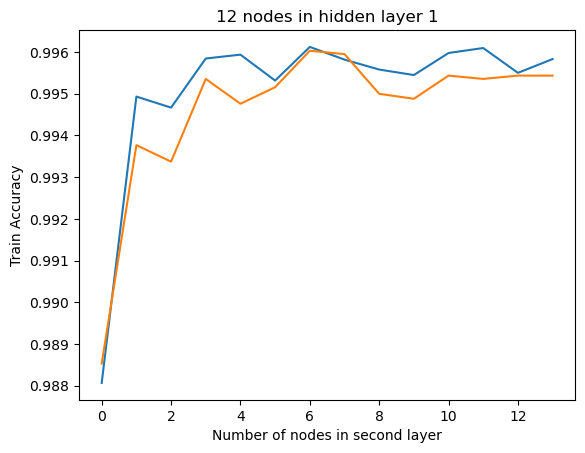

In [82]:
twelve_in_hl_one = layer_vs_accuracy[12]
plt.plot( [twelve_in_hl_one[i]['accuracy'][9] for i in range(1,15)] )
plt.xlabel("Number of nodes in second layer")
plt.ylabel("Train Accuracy")
plt.title("12 nodes in hidden layer 1")

plt.plot( [twelve_in_hl_one[i]['val_accuracy'][9] for i in range(1,15)] )
plt.xlabel("Number of nodes in second layer")
plt.ylabel("Train Accuracy")
plt.title("12 nodes in hidden layer 1")

plt.show()

In [85]:
max_val_accuracy = []
for i in range(8,13):
    selected = (0,0,0)
    for j in range(1,15):
        if layer_vs_accuracy[i][j]["val_accuracy"][9] > selected[2] :
            selected = (i,j,layer_vs_accuracy[i][j]["val_accuracy"][9])
    max_val_accuracy.append(selected)

    
def sortFn(tup):
    return tup[2]
max_val_accuracy.sort(key=sortFn , reverse=True)
max_val_accuracy

[(12, 7, 0.9960309863090515),
 (11, 14, 0.9957134127616882),
 (9, 10, 0.9956340789794922),
 (10, 7, 0.9956340789794922),
 (8, 11, 0.9953562021255493)]

<br/>
<br/>
<br/>
<br/>

# FINAL MODEL

In [86]:
model = tf.keras.Sequential([
            tf.keras.layers.Dense( 12 , activation=tf.keras.activations.relu , name = 'Hidden_layer_1' ),
            tf.keras.layers.Dense( 7 , activation=tf.keras.activations.relu , name = 'Hidden_layer_2' ),
            tf.keras.layers.Dense( no_output_layer_nodes , activation=tf.keras.activations.softmax , name = "output_layer" )
        ])

model.compile( optimizer='adam',
           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
           metrics=['accuracy'] )

history = model.fit( X_train , y_train , epochs=10 , validation_data=(X_val,y_val) , verbose = 1 )


Epoch 1/10
2362/2362 [==============================] - 10s 2ms/step - loss: 0.1771 - accuracy: 0.9482 - val_loss: 0.0551 - val_accuracy: 0.9831
Epoch 2/10
2362/2362 [==============================] - 5s 2ms/step - loss: 0.0383 - accuracy: 0.9894 - val_loss: 0.0318 - val_accuracy: 0.9932
Epoch 3/10
2362/2362 [==============================] - 5s 2ms/step - loss: 0.0255 - accuracy: 0.9938 - val_loss: 0.0267 - val_accuracy: 0.9936
Epoch 4/10
2362/2362 [==============================] - 5s 2ms/step - loss: 0.0219 - accuracy: 0.9945 - val_loss: 0.0255 - val_accuracy: 0.9942
Epoch 5/10
2362/2362 [==============================] - 5s 2ms/step - loss: 0.0197 - accuracy: 0.9948 - val_loss: 0.0227 - val_accuracy: 0.9941
Epoch 6/10
2362/2362 [==============================] - 5s 2ms/step - loss: 0.0181 - accuracy: 0.9952 - val_loss: 0.0216 - val_accuracy: 0.9950
Epoch 7/10
2362/2362 [==============================] - 5s 2ms/step - loss: 0.0176 - accuracy: 0.9953 - val_loss: 0.0233 - val_accuracy

In [87]:
y_pred = model.predict(X_test)

788/788 [==============================] - 2s 1ms/step


In [91]:
y_answer = []
for i in range(len(y_pred)):
    y_arr = np.array(y_pred[i])
    y_answer.append(np.argmax(y_arr))

In [92]:
y_answer

[0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,


In [94]:
from sklearn.metrics import classification_report
y_true = y_test
target_names = [ 'dos', 'normal', 'probe' , 'r2l' , 'u2r' ]
report = classification_report(y_true, y_answer, target_names=target_names)
print(report)

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00      9185
      normal       0.99      1.00      1.00     13653
       probe       0.99      0.98      0.98      2331
         r2l       1.00      0.53      0.69        17
         u2r       1.00      0.56      0.71         9

    accuracy                           1.00     25195
   macro avg       1.00      0.81      0.88     25195
weighted avg       1.00      1.00      1.00     25195



In [98]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_answer)
pd.DataFrame(cnf_matrix , index = target_names , columns = target_names)

,dos,normal,probe,r2l,u2r
dos,9172,13,0,0,0
normal,9,13617,27,0,0
probe,1,48,2282,0,0
r2l,1,6,1,9,0
u2r,0,4,0,0,5


In [99]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score 
accuracy = accuracy_score(y_test, y_answer)
precision = precision_score( y_test , y_answer , average = None )
recall = recall_score( y_test , y_answer , average = None )
f1score = f1_score( y_test , y_answer , average = None )

print(accuracy)
print(precision)
print(recall)
print(f1score)

0.9956340543758683
[0.99880213 0.99481297 0.98787879 1.         1.        ]
[0.99858465 0.99736322 0.97897898 0.52941176 0.55555556]
[0.99869338 0.99608646 0.98340875 0.69230769 0.71428571]


In [103]:
data = {
    "model" : "Neural Network",
    
    "Layers" : {
     "layer 1": {
         "nodes":12,
         "activation":"relu"
     },
     "layer 2":{
         "nodes":7,
         "activation":"relu"
     },
     "output layer":{
         "nodes":no_output_layer_nodes,
         "activation":"softmax"
     }   
    },
    "optimizer":"Adam",
    "loss":"Categorical Cross Entropy",
    "metrics":"accuracy",
    "epochs":10,
    
    "accuracy" : accuracy ,
    "precision" : precision.tolist() ,
    "recall" : recall.tolist() ,
    "F1_score" : f1score.tolist() ,
    "class_names" : target_names
}

data

{'model': 'Neural Network',
 'Layers': {'layer 1': {'nodes': 12, 'activation': 'relu'},
  'layer 2': {'nodes': 7, 'activation': 'relu'},
  'output layer': {'nodes': 5, 'activation': 'softmax'}},
 'optimizer': 'Adam',
 'loss': 'Categorical Cross Entropy',
 'metrics': 'accuracy',
 'epochs': 10,
 'accuracy': 0.9956340543758683,
 'precision': [0.9988021343787433,
  0.994812974868498,
  0.9878787878787879,
  1.0,
  1.0],
 'recall': [0.9985846488840501,
  0.997363216875412,
  0.978978978978979,
  0.5294117647058824,
  0.5555555555555556],
 'F1_score': [0.9986933797909407,
  0.9960864635529059,
  0.9834087481146305,
  0.6923076923076924,
  0.7142857142857143],
 'class_names': ['dos', 'normal', 'probe', 'r2l', 'u2r']}

In [104]:
import json
with open("../../model_performances/neural_network.json", "w") as outfile:
    json.dump(data, outfile)